# Importacion del Dataset ( Dataset de Clientes de Bancos en Europa)

In [22]:
import kagglehub
import pandas as pd
import os
import zipfile

# Descargar la √∫ltima versi√≥n del dataset
dataset_path = kagglehub.dataset_download("gauravtopre/bank-customer-churn-dataset")

# Extraer los archivos si est√°n en formato ZIP
if dataset_path.endswith(".zip"):
    extract_path = dataset_path.replace(".zip", "")  # Ruta donde se extraer√°n los archivos
    with zipfile.ZipFile(dataset_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)
    print("Archivos extra√≠dos en:", extract_path)
else:
    extract_path = dataset_path

# Listar los archivos extra√≠dos para encontrar el correcto
files = os.listdir(extract_path)
print("Archivos disponibles:", files)

# Cargar el archivo correcto en un DataFrame
for file in files:
    if file.endswith(".csv"):  # Buscar un archivo CSV
        file_path = os.path.join(extract_path, file)
        df = pd.read_csv(file_path)
        df.head()
        break
else:
    print("No se encontr√≥ un archivo CSV en la carpeta extra√≠da.")

Archivos disponibles: ['Bank Customer Churn Prediction.csv']


In [23]:
df.head()

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

## Descripcion de las Columnas


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


# Descripci√≥n de las Columnas del Dataset

A continuaci√≥n, se describen las columnas presentes en el dataset utilizado para la predicci√≥n de churn en clientes bancarios:

1. **customer_id**: Identificador √∫nico del cliente. *(No se utiliza como entrada en el modelo).*

2. **credit_score**: Puntuaci√≥n de cr√©dito del cliente. *(Utilizado como entrada en el modelo).*

3. **country**: Pa√≠s de residencia del cliente. *(Utilizado como entrada en el modelo).*

4. **gender**: G√©nero del cliente. *(Utilizado como entrada en el modelo).*

5. **age**: Edad del cliente. *(Utilizado como entrada en el modelo).*

6. **tenure**: Tiempo (en a√±os) que el cliente ha sido miembro activo del banco. *(Utilizado como entrada en el modelo).*

7. **balance**: Saldo actual del cliente en su cuenta bancaria. *(Utilizado como entrada en el modelo).*

8. **products_number**: N√∫mero de productos contratados por el cliente en el banco. *(Utilizado como entrada en el modelo).*

9. **credit_card**: Indica si el cliente tiene una tarjeta de cr√©dito con el banco (1 = S√≠, 0 = No). *(Utilizado como entrada en el modelo).*

10. **active_member**: Indica si el cliente es un miembro activo del banco (1 = S√≠, 0 = No). *(Utilizado como entrada en el modelo).*

11. **estimated_salary**: Salario estimado del cliente. *(Utilizado como entrada en el modelo).*

12. **churn**: Variable objetivo que indica si el cliente ha abandonado el banco durante un per√≠odo determinado (1 = S√≠, 0 = No). *(Utilizado como la variable de salida del modelo).*

## Eliminar columnas innecesarias

In [25]:
# Eliminar columnas innecesarias
Data_Model= df.drop(columns="customer_id")
Data_Model.head()

credit_score country  gender  age  tenure    balance  products_number  \
0           619  France  Female   42       2       0.00                1   
1           608   Spain  Female   41       1   83807.86                1   
2           502  France  Female   42       8  159660.80                3   
3           699  France  Female   39       1       0.00                2   
4           850   Spain  Female   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1         101348.88      1  
1            0              1         112542.58      0  
2            1              0         113931.57      1  
3            0              0          93826.63      0  
4            1              1          79084.10      0

## Codificacion Variables Categoricas

   country  estimated_salary  Order
0    Spain      99440.572281      0
1   France      99899.180814      1
2  Germany     101113.435102      2


<ipython-input-26-488ea1c934d8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="country", y="estimated_salary", data=Data_Country,color=colors[0],palette="viridis")


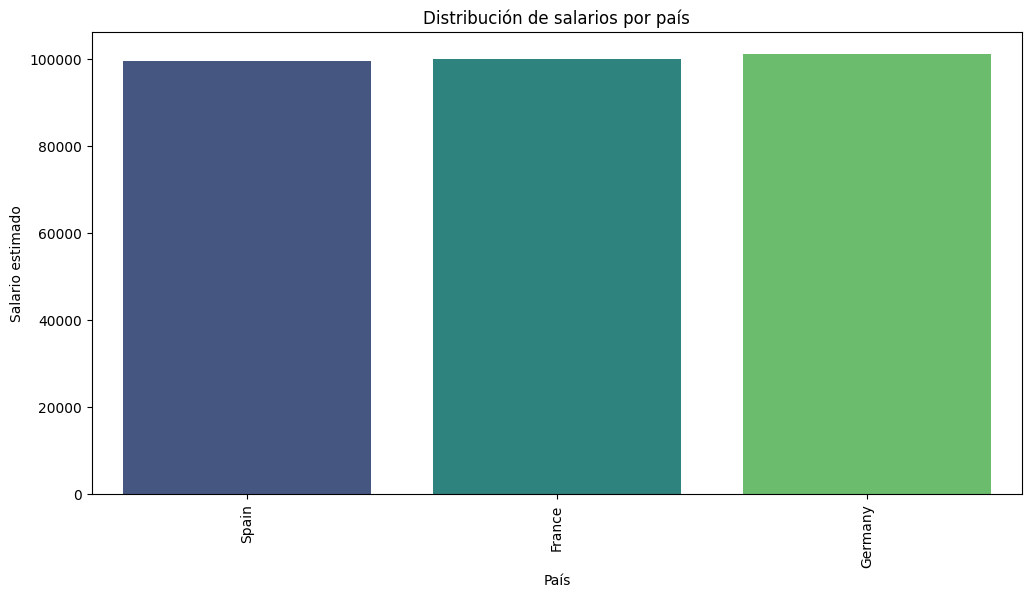

In [26]:
# Visualizar la distribucion promedio de salarios de paises para su codificacion

import matplotlib.pyplot as plt
import seaborn as sns

Data_Country= Data_Model.groupby("country")["estimated_salary"].mean().reset_index()
Data_Country= Data_Country.sort_values("estimated_salary", ascending=True,ignore_index=True)
Data_Country["Order"]= Data_Country.index
print(Data_Country.head())

# Visualizar la distribucion de salarios por pais
plt.figure(figsize=(12,6))
colors= sns.color_palette("husl", 10)
sns.barplot(x="country", y="estimated_salary", data=Data_Country,color=colors[0],palette="viridis")
plt.title("Distribuci√≥n de salarios por pa√≠s")
plt.ylabel("Salario estimado")
plt.xlabel("Pa√≠s")
plt.xticks(rotation=90)
plt.show()


In [27]:
# Codificar la columna "country" con el promedio de salario de cada pa√≠s
Dict_Country = Data_Country.set_index("country")["Order"].to_dict()
print(Dict_Country)

# Reemplazar los valores de la columna "country" por su codificaci√≥n
Data_Model["country"]= Data_Model["country"].map(Dict_Country)
Data_Model.head()


{'Spain': 0, 'France': 1, 'Germany': 2}


credit_score  country  gender  age  tenure    balance  products_number  \
0           619        1  Female   42       2       0.00                1   
1           608        0  Female   41       1   83807.86                1   
2           502        1  Female   42       8  159660.80                3   
3           699        1  Female   39       1       0.00                2   
4           850        0  Female   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1         101348.88      1  
1            0              1         112542.58      0  
2            1              0         113931.57      1  
3            0              0          93826.63      0  
4            1              1          79084.10      0

<ipython-input-28-0d7892ca9246>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gender", y="estimated_salary", data=Data_Gender,color=colors[0],palette="viridis")


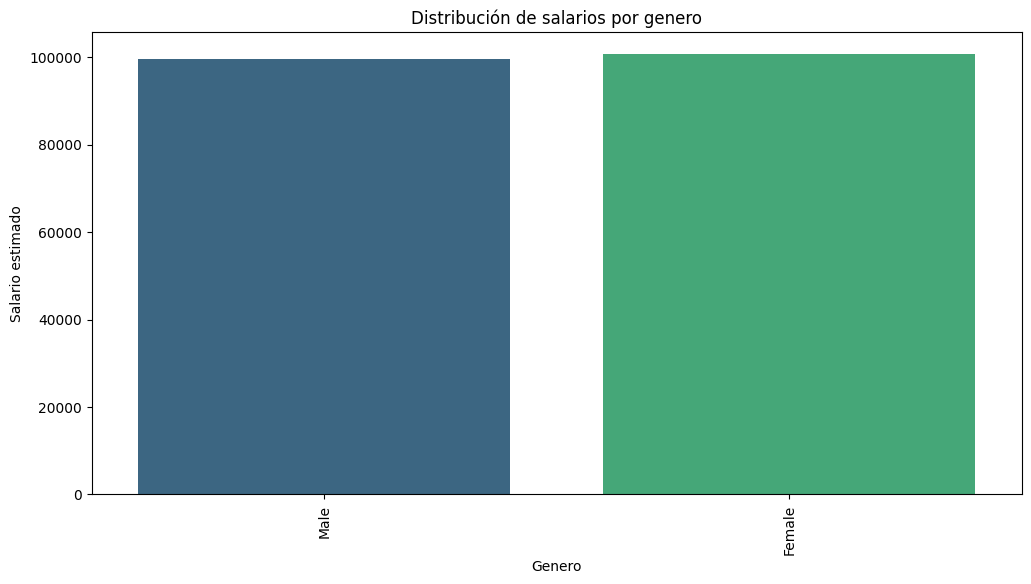

gender  estimated_salary  Order
0    Male      99664.576931      0
1  Female     100601.541382      1

In [28]:
## Visualizar la distribucion de salarios por genero

Data_Gender=Data_Model.groupby("gender")["estimated_salary"].mean().reset_index()
Data_Gender=Data_Gender.sort_values("estimated_salary", ascending=True,ignore_index=True)
Data_Gender["Order"]=Data_Gender.index

plt.figure(figsize=(12,6))
colors= sns.color_palette("husl", 10)
sns.barplot(x="gender", y="estimated_salary", data=Data_Gender,color=colors[0],palette="viridis")
plt.title("Distribuci√≥n de salarios por genero")
plt.ylabel("Salario estimado")
plt.xlabel("Genero")
plt.xticks(rotation=90)
plt.show()
Data_Gender.head()


In [29]:
# Codificar la columna "country" con el promedio de salario de cada pa√≠s
Dict_Gender = Data_Gender.set_index("gender")["Order"].to_dict()
print(Dict_Gender)

# Codificar la variable gender en el dataset original
Data_Model["gender"]=Data_Model["gender"].map(Dict_Gender)
Data_Model.head()

{'Male': 0, 'Female': 1}


credit_score  country  gender  age  tenure    balance  products_number  \
0           619        1       1   42       2       0.00                1   
1           608        0       1   41       1   83807.86                1   
2           502        1       1   42       8  159660.80                3   
3           699        1       1   39       1       0.00                2   
4           850        0       1   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1         101348.88      1  
1            0              1         112542.58      0  
2            1              0         113931.57      1  
3            0              0          93826.63      0  
4            1              1          79084.10      0

## Visualizacion de las distribucciones

In [30]:
Data_Model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  int64  
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


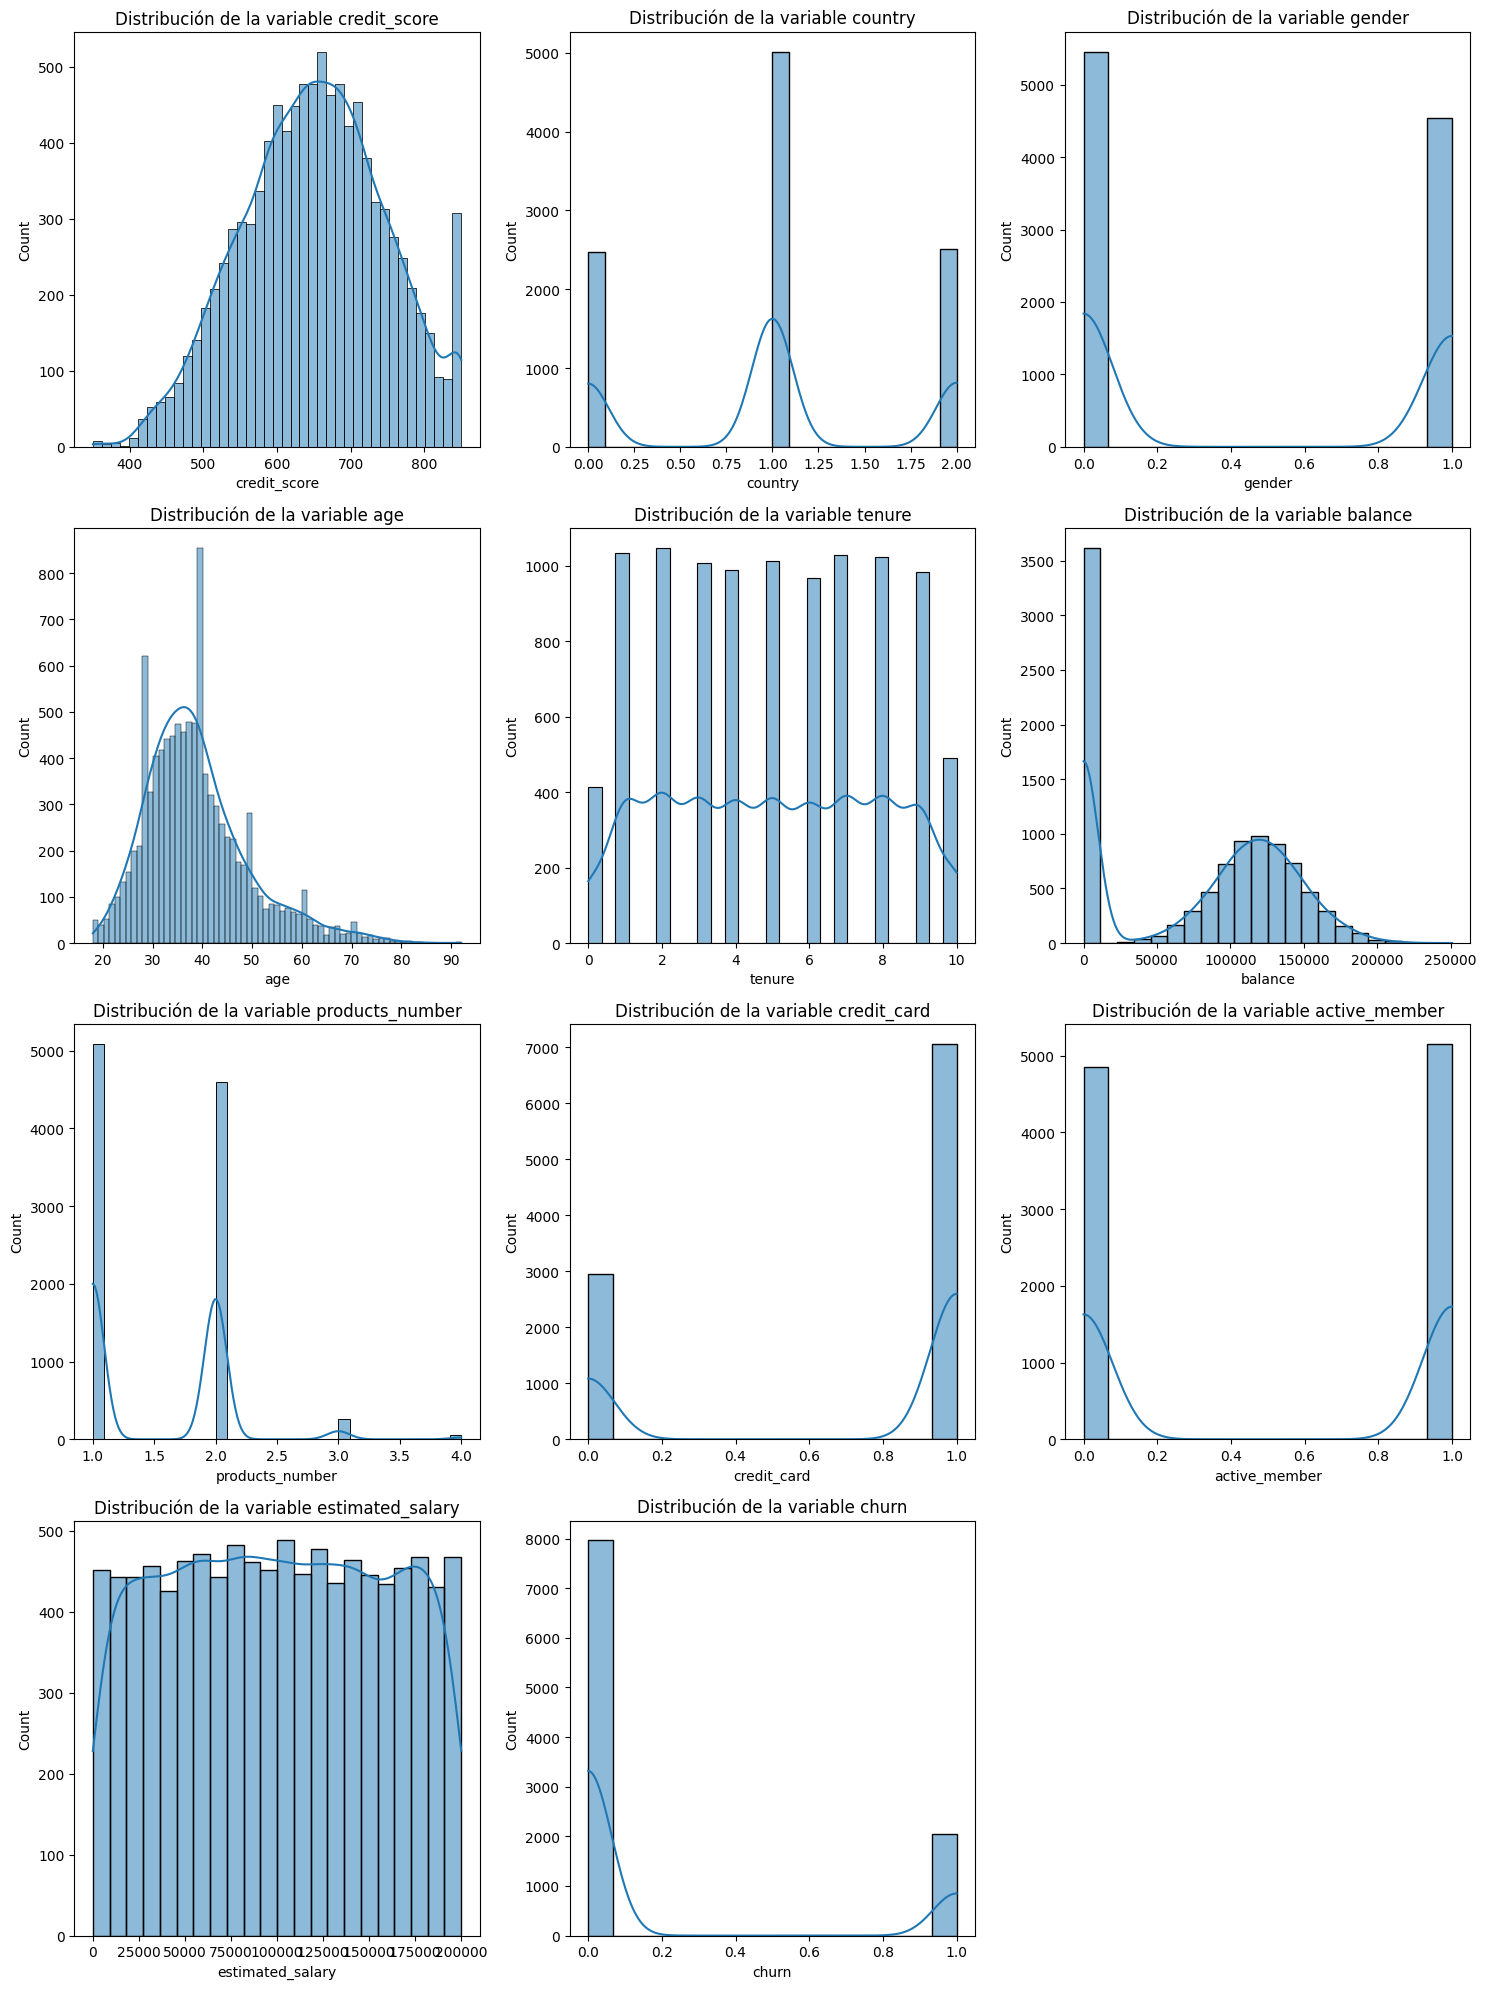

In [31]:
import math
import random

# Obtener los nombres de las columnas
Colums_name = Data_Model.columns.values

# Calcular el n√∫mero de filas y columnas para los subplots
num_columns = 3  # N√∫mero de gr√°ficos por fila
num_rows = math.ceil(len(Colums_name) / num_columns)  # N√∫mero de filas necesarias

# Crear la figura y los subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar f√°cilmente

# Generar un histograma para cada columna
for idx, col in enumerate(Colums_name):
    sns.histplot(Data_Model[col], kde=True, ax=axes[idx])
    axes[idx].set_title("Distribuci√≥n de la variable " + col)

# Eliminar subplots vac√≠os si hay m√°s subplots que columnas
for i in range(len(Colums_name), len(axes)):
    fig.delaxes(axes[i])

# Ajustar el dise√±o
plt.tight_layout()
plt.show()

<ipython-input-32-7fd42e217987>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=Data_Model[col], ax=axes[idx],palette=random.choice(Colors))
<ipython-input-32-7fd42e217987>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=Data_Model[col], ax=axes[idx],palette=random.choice(Colors))
<ipython-input-32-7fd42e217987>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=Data_Model[col], ax=axes[idx],palette=random.choice(Colors))
<ipython-input-32-7fd42e217987>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wil

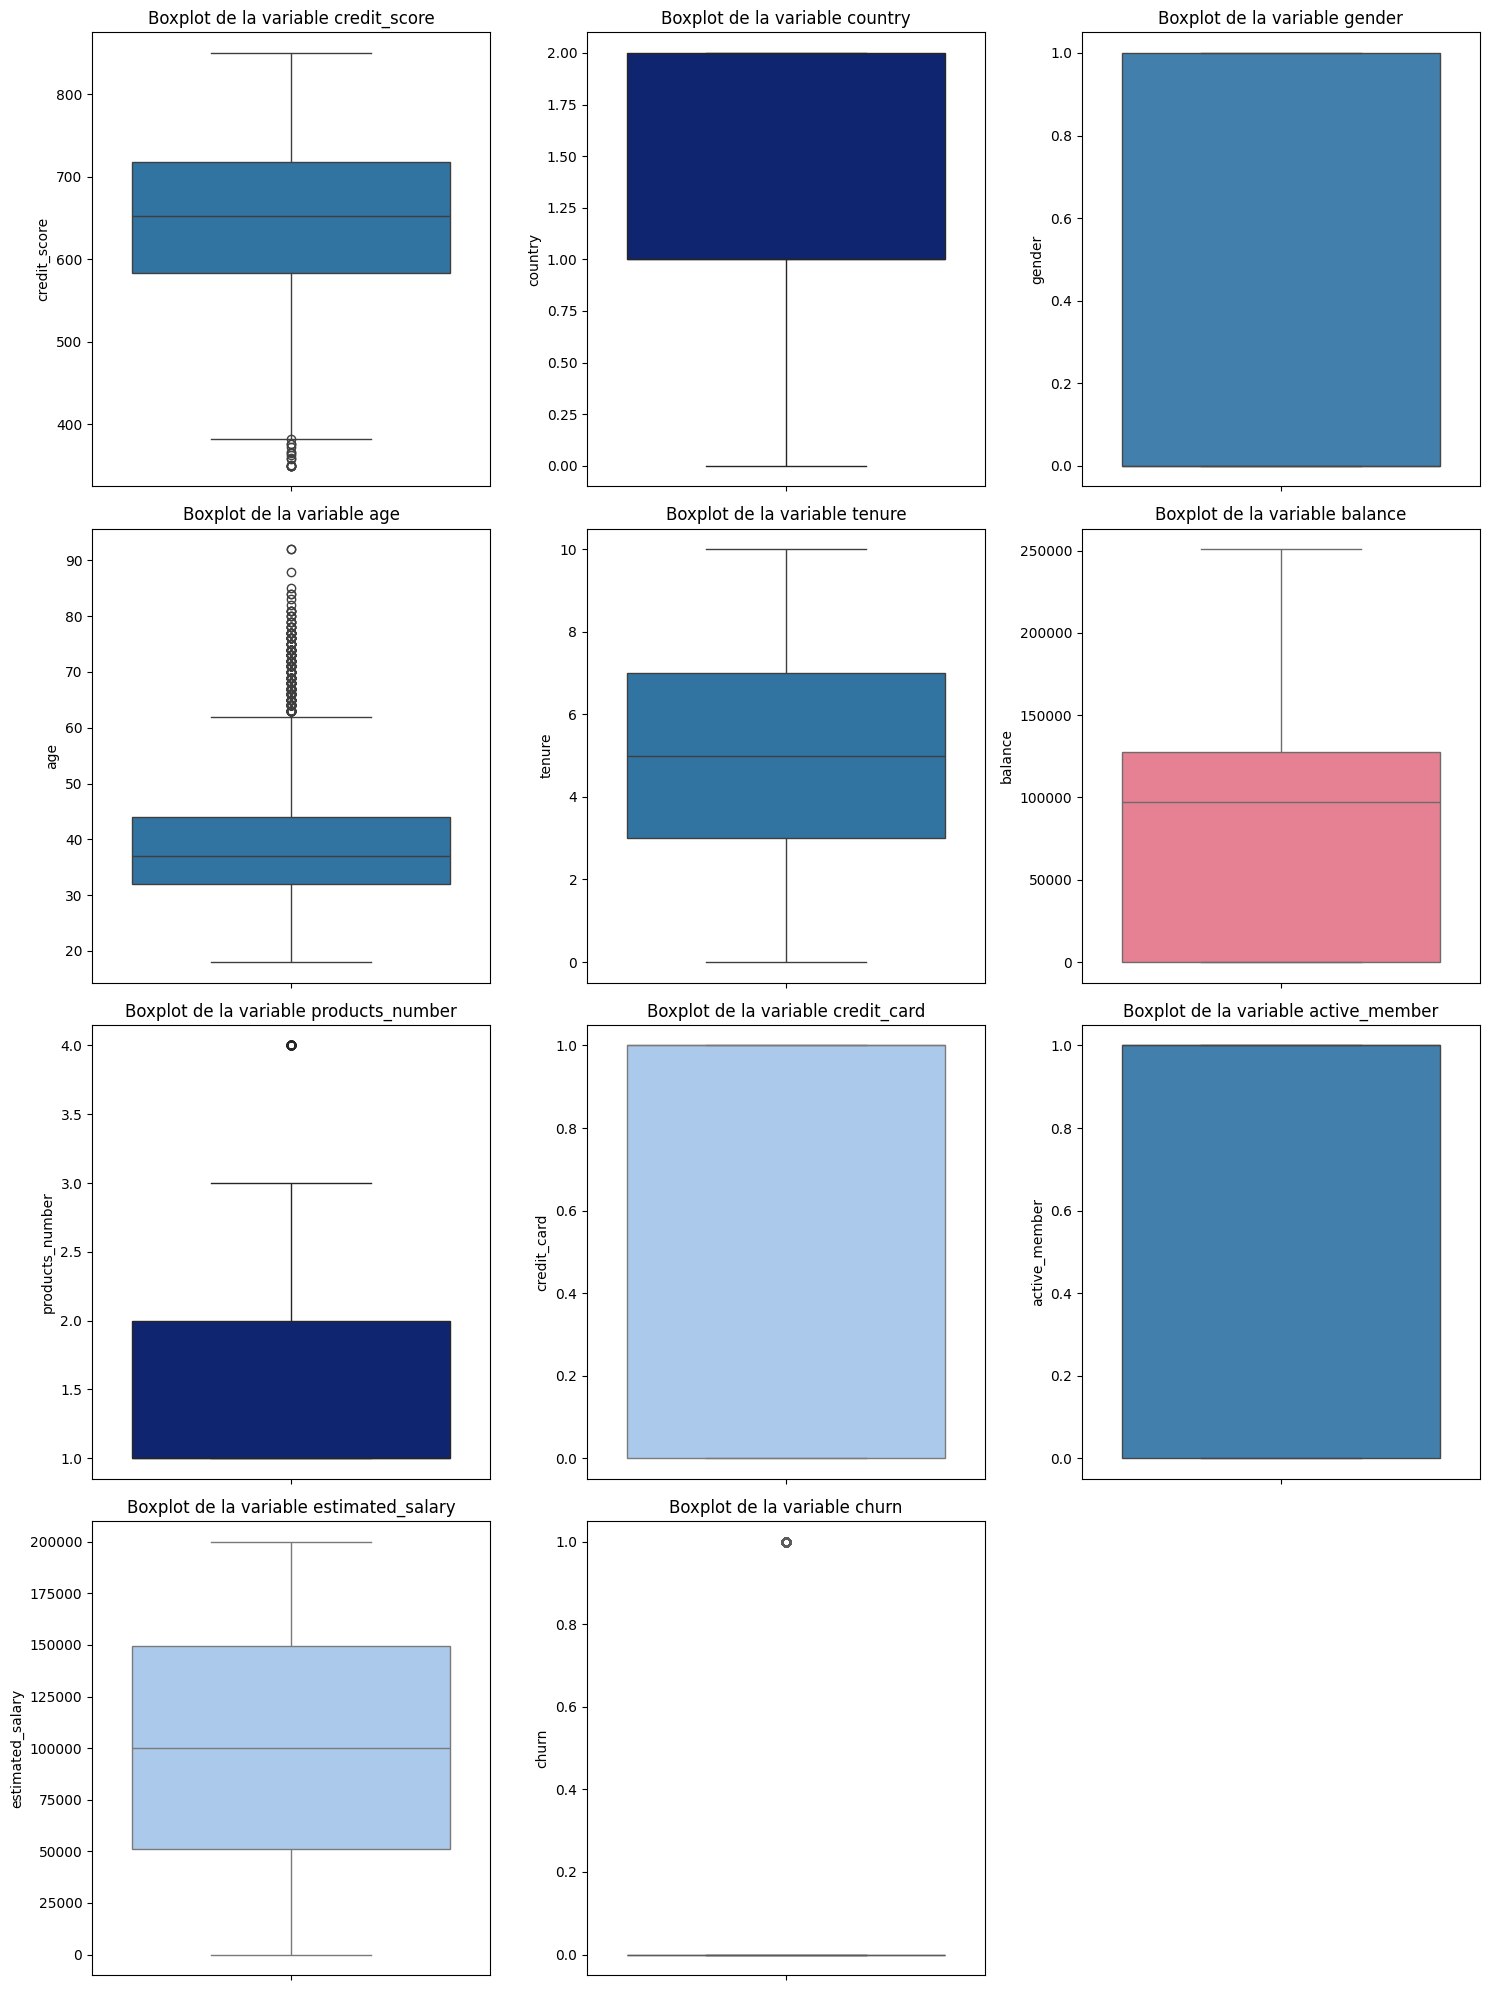

In [32]:
# Crear la figura y los subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar f√°cilmente

# Generar un boxplot para cada columna
Colors=['bright','deep','colorblind','muted','pastel','dark','hls','husl','tab10','tab20','tab20b','tab20c']
for idx, col in enumerate(Colums_name):
    sns.boxplot(y=Data_Model[col], ax=axes[idx],palette=random.choice(Colors))
    axes[idx].set_title("Boxplot de la variable " + col)

# Eliminar subplots vac√≠os si hay m√°s subplots que columnas
for i in range(len(Colums_name), len(axes)):
    fig.delaxes(axes[i])

# Ajustar el dise√±o
plt.tight_layout()
plt.show()

## Visualizacion de la correlacion entre Variables

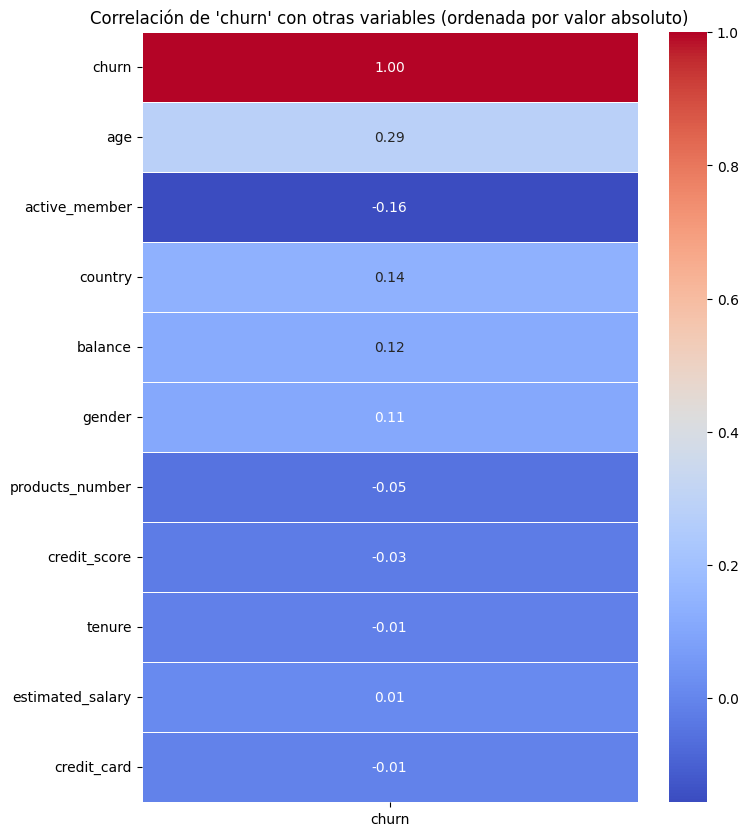

In [33]:
import numpy as np

# Calcular la matriz de correlaci√≥n
corr = Data_Model.corr()

# Ordenar las variables por el valor absoluto de su correlaci√≥n con "churn"
corr_churn = corr[["churn"]].reindex(corr["churn"].abs().sort_values(ascending=False).index)

# Configurar el tama√±o de la figura
plt.figure(figsize=(8, 10))

# Dibujar el mapa de calor para "churn"
sns.heatmap(corr_churn, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)

# T√≠tulo del gr√°fico
plt.title("Correlaci√≥n de 'churn' con otras variables (ordenada por valor absoluto)")
plt.show()

# **Justificaci√≥n de la elecci√≥n de variables, algoritmo y m√©trica prioritaria para la predicci√≥n de churn en banca**

## **Elecci√≥n de variables**  
Las variables fueron seleccionadas en funci√≥n de su correlaci√≥n con el churn. Bas√°ndonos en la matriz de correlaci√≥n, priorizamos aquellas con mayor impacto en la variable objetivo:

1. **Edad (0.29)** ‚Üí Los clientes de mayor edad tienen mayor tendencia a abandonar.  
2. **Miembro activo (-0.16)** ‚Üí Los clientes activos tienen menor probabilidad de churn.  
3. **Pa√≠s (0.14)** ‚Üí Puede indicar diferencias en la retenci√≥n por regi√≥n.  
4. **Balance (0.12)** ‚Üí Clientes con mayores saldos podr√≠an tener menor churn.  
5. **G√©nero (0.11)** ‚Üí Aunque su impacto es bajo, puede influir en ciertos segmentos.  

Variables con muy baja correlaci√≥n como **tenure, credit score, credit card, estimated salary** tienen menor peso en la predicci√≥n y podr√≠an ser descartadas o tratadas con t√©cnicas de reducci√≥n de dimensionalidad.

Vemos que las variables que menos se relacionan con el modelo son credit card, estimated salary y trenure , podrian ser candidatos a ser eliminados para el entrenamiento del modelo.


## Normalizacion de variables para entrenar el modelo

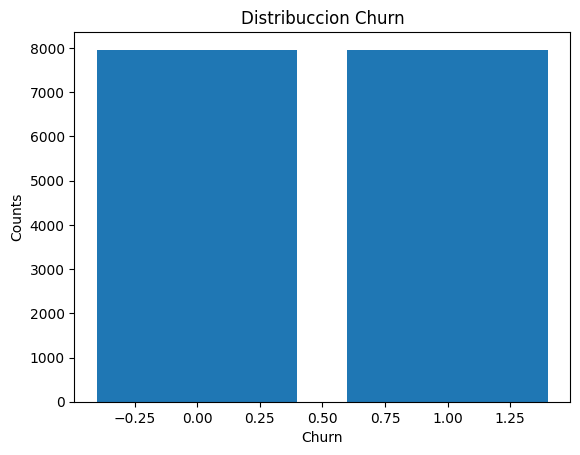

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Dividir el dataset en variables dependientes e independientes

X = Data_Model.drop(columns="churn")
y = Data_Model["churn"]
#Aplicar SMOTE para balancear las clases
resampler = SMOTE()
X,y = resampler.fit_resample(X,y)

plt.bar(y.value_counts().index , y.value_counts().values)
plt.title('Distribuccion Churn')
plt.xlabel('Churn')
plt.ylabel('Counts')
plt.show()

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las variables independientes
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Random Forest

Fitting 5 folds for each of 2 candidates, totalling 10 fits

Mejores hiperpar√°metros encontrados:
{'n_estimators': 300}

Matriz de confusi√≥n:
[[1398  235]
 [ 241 1312]]

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1633
           1       0.85      0.84      0.85      1553

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186


Exactitud: 0.8505963590709353
Precisi√≥n: 0.848093083387201
Recall: 0.8448164842240824
F1: 0.8464516129032258


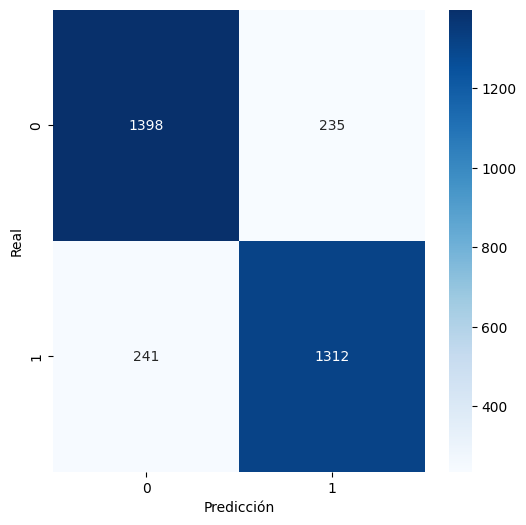

                        Model  Accuracy  Precision    Recall        F1
0  Random Forest (GridSearch)  0.850596   0.848093  0.844816  0.846452


In [36]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los hiperpar√°metros a probar
param_grid = {
    "n_estimators": [100, 300]
}

# Inicializar el modelo base
rf = RFC(random_state=42, n_jobs=-1)

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid,
    scoring="f1",  # Se optimiza la m√©trica F1
    cv=5,          # Validaci√≥n cruzada de 5 folds
    verbose=2,     # Muestra el progreso
    n_jobs=-1      # Usa todos los n√∫cleos disponibles
)

# Entrenar el modelo con b√∫squeda de hiperpar√°metros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado
best_rf = grid_search.best_estimator_

# Realizar predicciones
y_pred = best_rf.predict(X_test)

# Mostrar los mejores hiperpar√°metros encontrados
print("\nMejores hiperpar√°metros encontrados:")
print(grid_search.best_params_)

# Mostrar m√©tricas de evaluaci√≥n
print("\nMatriz de confusi√≥n:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred))
print("\nExactitud:", accuracy_score(y_test, y_pred))
print("Precisi√≥n:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

# Visualizar la matriz de confusi√≥n
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.show()

# Adjuntar resultados en un dataframe para comparar
Results = pd.DataFrame({
    "Model": ["Random Forest (GridSearch)"],
    "Accuracy": [accuracy_score(y_test, y_pred)],
    "Precision": [precision_score(y_test, y_pred)],
    "Recall": [recall_score(y_test, y_pred)],
    "F1": [f1_score(y_test, y_pred)]
})

print(Results)


## XGB Classifier

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:38:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Mejores hiperpar√°metros encontrados:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Matriz de confusi√≥n:
[[1375  258]
 [ 259 1294]]

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1633
           1       0.83      0.83      0.83      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186


Exactitud: 0.8377275580665411
Precisi√≥n: 0.8337628865979382
Recall: 0.8332260141661301
F1: 0.8334943639291466


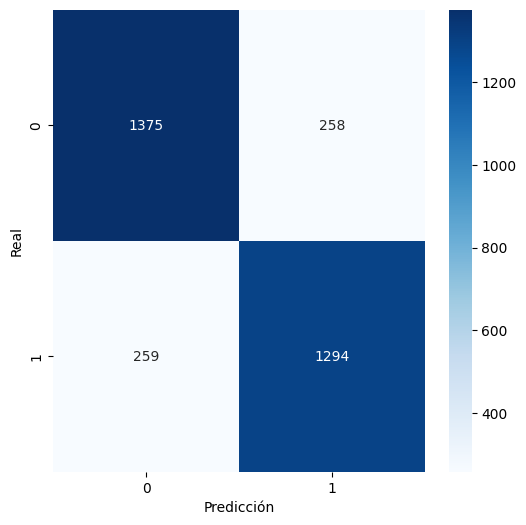

                        Model  Accuracy  Precision    Recall        F1
0  Random Forest (GridSearch)  0.850596   0.848093  0.844816  0.846452
1   XGBoost (Fast GridSearch)  0.837728   0.833763  0.833226  0.833494


In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir un espacio de b√∫squeda reducido para ejecutar m√°s r√°pido
param_grid = {
    "n_estimators": [100, 200],  # N√∫mero de √°rboles
    "max_depth": [3, 5],         # Profundidad de los √°rboles
    "learning_rate": [0.05, 0.1] # Tasa de aprendizaje
}

# Inicializar el modelo base
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

# Configurar GridSearchCV con menos combinaciones para mayor rapidez
grid_search = GridSearchCV(
    estimator=xgb, param_grid=param_grid,
    scoring="f1", cv=3, verbose=1, n_jobs=-1
)

# Entrenar el modelo con b√∫squeda de hiperpar√°metros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado
best_xgb = grid_search.best_estimator_

# Realizar predicciones
y_pred = best_xgb.predict(X_test)

# Mostrar los mejores hiperpar√°metros encontrados
print("\nMejores hiperpar√°metros encontrados:")
print(grid_search.best_params_)

# Mostrar m√©tricas de evaluaci√≥n
print("\nMatriz de confusi√≥n:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificaci√≥n:")
print(classification_report(y_test, y_pred))
print("\nExactitud:", accuracy_score(y_test, y_pred))
print("Precisi√≥n:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

# Visualizar la matriz de confusi√≥n
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.show()

# Adjuntar resultados en un dataframe para comparar
XGB_results = pd.DataFrame({
    "Model": ["XGBoost (Fast GridSearch)"],
    "Accuracy": [accuracy_score(y_test, y_pred)],
    "Precision": [precision_score(y_test, y_pred)],
    "Recall": [recall_score(y_test, y_pred)],
    "F1": [f1_score(y_test, y_pred)]
})

Results = pd.concat([Results, XGB_results], ignore_index=True)

print(Results)


In [38]:
# Exportar el modelo XGBOOST
import joblib
joblib.dump(best_xgb, "best_xgb.pkl")

['best_xgb.pkl']



---

## **Elecci√≥n del Algoritmo**  
Se compararon **Random Forest y XGBoost**, encontrando que **Random Forest con GridSearch** tuvo un mejor desempe√±o en todas las m√©tricas clave. Es un modelo robusto que maneja bien datos desbalanceados y no linealidades, caracter√≠sticas comunes en churn bancario.  

üîπ **Elecci√≥n final:** üìå **Random Forest (con ajuste de hiperpar√°metros v√≠a GridSearch).**

---

## **M√©trica Prioritaria**  
En la industria bancaria, predecir churn de manera efectiva es crucial porque la retenci√≥n de clientes es m√°s rentable que adquirir nuevos.  

Entre las m√©tricas disponibles (**Accuracy, Precision, Recall y F1-score**), priorizamos:  

‚úÖ **F1-score (84.6%)**:  
- Balancea **Precision** y **Recall**, minimizando falsos negativos y falsos positivos.  
- Evita que el banco ignore clientes que realmente van a irse (**alto Recall**).  
- Reduce alertas innecesarias para clientes que no abandonar√°n (**alta Precision**).  

üìå **Decisi√≥n final:** La m√©trica prioritaria es **F1-score**, ya que maximiza la detecci√≥n efectiva de churn sin incrementar excesivamente los falsos positivos.

---

## **Conclusi√≥n**  
üîπ **Modelo seleccionado:** Random Forest (con GridSearch).  
üîπ **Variables clave:** Edad, Miembro Activo, Pa√≠s, Balance y G√©nero.  
üîπ **M√©trica principal:** F1-score (84.6%), optimizando el equilibrio entre detecci√≥n y precisi√≥n.  

Este enfoque permite a la banca tomar acciones efectivas para retener clientes con alta probabilidad de churn y optimizar estrategias de fidelizaci√≥n. üöÄ
## üöÄ **Impacto en la Banca:**  
Un banco que predice correctamente el churn puede **optimizar campa√±as de retenci√≥n**, **reducir costos** y **mejorar la rentabilidad**. 
Se prioriza el F1 Score ya que nos permite tener una prediccion balanceada entre los que no se van a ir y los que se van a ir (que es nuestro caso de interes) , en contraparte del caso de la presicion, que podria detectar la mayoria de los casos que no se van a ir , a los cuales no es necesario aplicar una estrategia enfocada a ese cliente , por esta razon balanceamos los datos previos al entrenamiento del modelo.